# Competição Externa - BigData

texto texto texto

## Bibliotecas que serão usadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.cm import get_cmap

from pandas_profiling import ProfileReport

plt.style.use("ggplot")

## Lendo os dados


In [2]:
data = pd.read_csv("data/faturamento_lojas_atuais.csv")

data.head(10)

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30
5,1,2016,6,CATEG_01,108.0,4741.36
6,1,2016,7,CATEG_01,111.0,5604.77
7,1,2016,8,CATEG_01,86.0,3987.35
8,1,2016,9,CATEG_01,148.0,5543.12
9,1,2016,10,CATEG_01,147.0,4996.06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB


Para o começo, vamos fazer um profilling.

In [5]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [7]:
profile.to_file("report-fla-1.html")

## Analise dos dados

### Receita / Qtde

Para começar a analise dos dados vamos criar mais um atributo, ele vai verificar a "Receita / Quantidade", vai ajudar a verificar a relação entre ambos os atributos.

In [4]:
data["rec_un"] = data["receita"] / data["qtde"]

data.head(10)

,cod_loja,ano,mes,categoria,qtde,receita,rec_un
0,1,2016,1,CATEG_01,301.0,9164.86,30.448040
1,1,2016,2,CATEG_01,187.0,8175.55,43.719519
2,1,2016,3,CATEG_01,242.0,10521.67,43.477975
3,1,2016,4,CATEG_01,104.0,4560.91,43.854904
4,1,2016,5,CATEG_01,100.0,4263.30,42.633000
5,1,2016,6,CATEG_01,108.0,4741.36,43.901481
6,1,2016,7,CATEG_01,111.0,5604.77,50.493423
7,1,2016,8,CATEG_01,86.0,3987.35,46.364535
8,1,2016,9,CATEG_01,148.0,5543.12,37.453514
9,1,2016,10,CATEG_01,147.0,4996.06,33.986803


Vamos agrupar as categorias e fazer analises a partir delas.

In [5]:
data_categorias = data.groupby(["categoria"])

Vamos verificar a receita unitaria por categoria.

In [6]:
receita_unitaria_categoria = [[], []]

for (cat, df) in data_categorias:
    receita_unitaria_categoria[0].append(cat)
    receita_unitaria_categoria[1].append(df.rec_un.sum())
    print(receita_unitaria_categoria[0][len(receita_unitaria_categoria[0]) - 1], receita_unitaria_categoria[1][len(receita_unitaria_categoria[1]) - 1])

CATEG_01 2125339.350360004
CATEG_02 1580406.5502526003
CATEG_03 2171944.3767342353
CATEG_04 2746816.951001936
CATEG_05 2959746.9412683113
CATEG_06 3824528.892864199
CATEG_07 1643342.8293523947
CATEG_08 7555989.557089456
CATEG_09 2617596.438245725
CATEG_10 3554679.3732320196
CATEG_11 6739007.523648005
CATEG_12 1277777.5788737908
CATEG_13 2959447.0946994224
CATEG_14 185576.0801370619
CATEG_15 24446.548333333332
CATEG_16 59.980000000000004


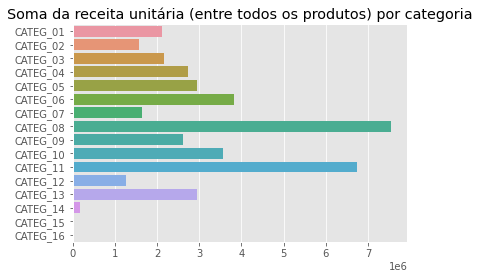

In [7]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[1], orient = "h")
plt.title("Soma da receita unitária (entre todos os produtos) por categoria")
plt.show()

Também podemos ver a média.

In [8]:
receita_unitaria_categoria = [[], []]

for (cat, df) in data_categorias:
    receita_unitaria_categoria[0].append(cat)
    receita_unitaria_categoria[1].append(df.rec_un.sum() / len(df))
    print(receita_unitaria_categoria[0][len(receita_unitaria_categoria[0]) - 1], receita_unitaria_categoria[1][len(receita_unitaria_categoria[1]) - 1])

CATEG_01 28.98321765116602
CATEG_02 29.969403994625864
CATEG_03 29.495286021079558
CATEG_04 37.45114734677596
CATEG_05 40.193201081891296
CATEG_06 52.407318646480384
CATEG_07 22.315596330201853
CATEG_08 102.87115978120728
CATEG_09 35.54633330498411
CATEG_10 48.30318073177453
CATEG_11 91.51410969252713
CATEG_12 17.35238506285958
CATEG_13 41.701735943458544
CATEG_14 2.6537026517147173
CATEG_15 26.118107193732193
CATEG_16 29.990000000000002


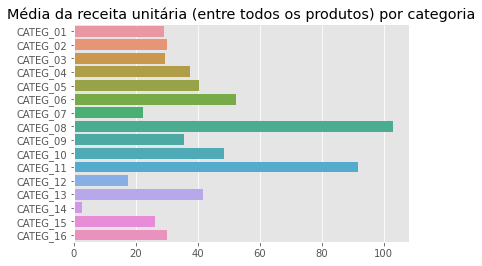

In [9]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[1], orient = "h")
plt.title("Média da receita unitária (entre todos os produtos) por categoria")
plt.show()

texto texto texto

### Combinações de categorias

Vamos verificar como a receita das lojas de acordo com as diferentes combinações de categorias.

In [10]:
data_lojas = data.groupby(["cod_loja"])

In [77]:
receita_lojas_cats = {}

for (loja, df) in data_lojas:
    # Verifica as diferentes categorias que aquela loja possui
    categorias = list(df.categoria.unique())
    identificador = "/".join(categorias)

    # Guarda a combinação de categorias
    if identificador in receita_lojas_cats:
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())
    else:
        receita_lojas_cats[identificador] = {
            "lojas": [],
            "receita": [],
            "rec_un": []
        }
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())

In [85]:
i = 0
for label in receita_lojas_cats:
    print(i, label, "\n")
    i = i + 1

0 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

1 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

2 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15/CATEG_16 

3 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

4 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

5 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13 

6 CATEG_03/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

7 CATEG_01/CATEG_04/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

8 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CAT

Vamos mostrar alguns gráficos.

In [82]:
receita_cats = [[], []]

i = 0
for label in receita_lojas_cats:
    receita_cats[0].append(i)
    receita_cats[1].append(np.mean(receita_lojas_cats[label]["rec_un"]))

    i = i + 1

In [83]:
receita_cats

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [13413.788673544781,
  13757.307109139885,
  14197.255381891446,
  9702.379142078682,
  13375.656735334098,
  680.2752299396939,
  490.15250087077675,
  409.75298786181133,
  571.1965627196722]]

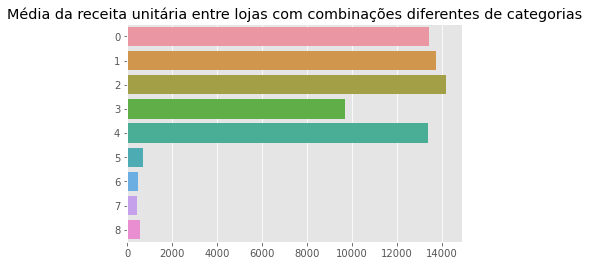

In [84]:
sns.barplot(y = receita_cats[0], x = receita_cats[1], orient = "h")
plt.title("Média da receita unitária entre lojas com combinações diferentes de categorias")
plt.show()